<font size=6><b>Lec00.캔들차트</b></font>

In [1]:
# pip install pandas-datareader
# pip install yfinance

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pykrx import stock
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load

In [3]:
df = stock.get_market_ohlcv_by_date('20200101', '20200630', '005930')   #날짜포맷: '%Y%m%d'
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171


In [4]:
# df = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')
# df.head()

<table border=1>
<tr>
<td colspan=2>111222</td>
</tr>
<tr>
<td rowspan=2>333</td><td>444</td>
</tr>
<tr>
<td>666</td>
</tr>
</table>

# matplot 캔들 스틱 차트

<img src='https://wikidocs.net/images/page/4765/r15.16.png' width=600>

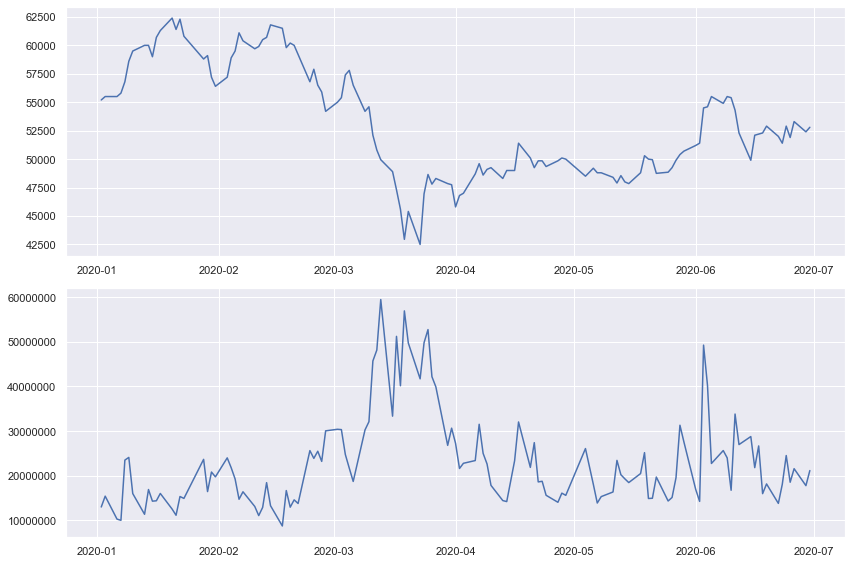

In [5]:
fig = plt.figure(figsize=(12, 8))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan=2, colspan=4)
btm_axes = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
btm_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(df.index, df['종가'], label='Close')
btm_axes.plot(df.index, df['거래량'])

plt.tight_layout()  #최대 크기로 출력
plt.show()

# mplfinance 캔들 스틱 차트

In [6]:
# ! pip install mpl_finance

In [7]:
import mpl_finance
import matplotlib.ticker as ticker

c:\it\pythonproject2\venv\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


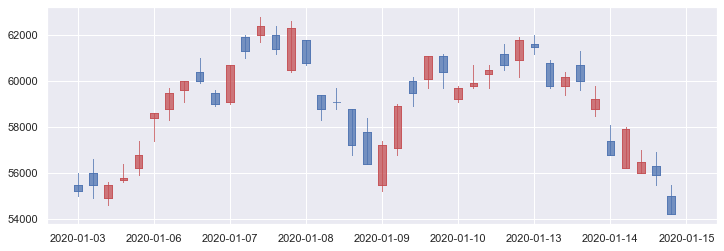

In [8]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

dfcp = df.iloc[:40]

date_list = dfcp.index.strftime('%Y-%m-%d')
# print(date_list)
ax.xaxis.set_major_formatter(ticker.FixedFormatter(date_list))

mpl_finance.candlestick2_ohlc(ax, dfcp['시가'], dfcp['고가'], dfcp['저가'], dfcp['종가'], width=0.5, colorup='r', colordown='b')
plt.show()

## mplfinance , mpl_finance 버전 업

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.097656  12993228
2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.753906  15422255
2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.753906  10278951
2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.402344  10009778
2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.246094  23501171


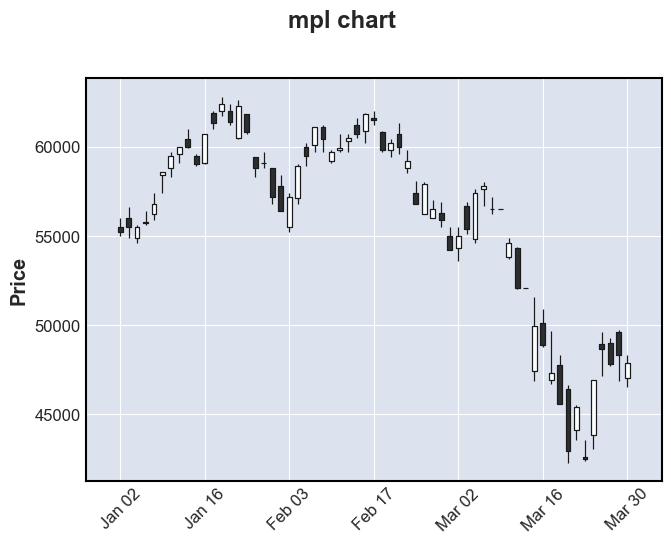

In [14]:
import mplfinance as mpf

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('005930.KS', '2020-01-01', '2020-03-31')
print(df.head())

mpf.plot(df, title="mpl chart", type="candle")

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.097656  12993228
2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.753906  15422255
2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.753906  10278951
2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.406250  10009778
2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.250000  23501171


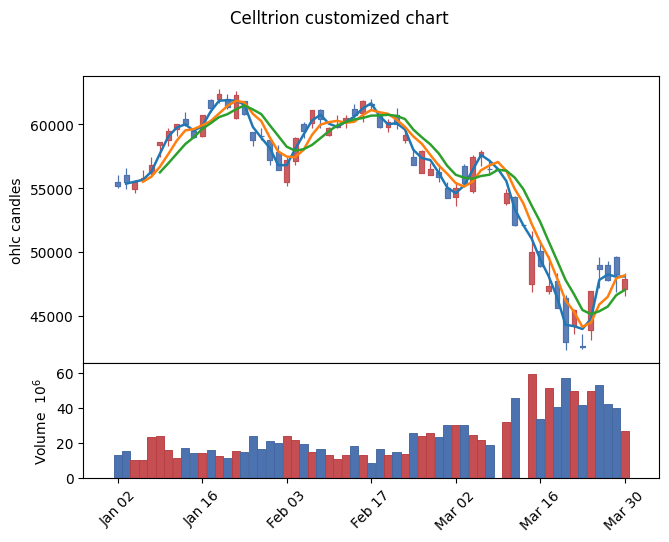

In [15]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('005930.KS', '2020-01-01', '2020-03-31')
print(df.head())

kwargs = dict(title='Celltrion customized chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)

# cufflinks 캔들 스틱 차트
* jupyter에선 볼 수 없다

In [ ]:
# ! pip install cufflinks
# ! pip install chart_studio

In [ ]:
# import chart_studio.plotly as py
# import plotly

import cufflinks as cf
cf.set_config_file(offline=True)

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
dfcp = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')

# QuantFig 매소드를 사용해서 그래프 그리기 -
# 내부적으로 컬럼 이름을  column=self._d['close'] , _d['volume']로 찾는다.
qf=cf.QuantFig(dfcp, title='Samsung', legend='top', name='삼성')
qf.add_bollinger_bands()
qf.add_volume()
qf.add_macd()
# qf.iplot()

* pycharm에서 실행 시 웹브라우저로 볼 수 있다.<br>
<img src="./img/img01.png">

# plotly 캔들 스틱 차트
* ref : https://plotly.com/python/candlestick-charts/
* jupyter에선 볼 수 없다

In [ ]:
# ! pip install plotly

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')
print(df.head())

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# fig.show()

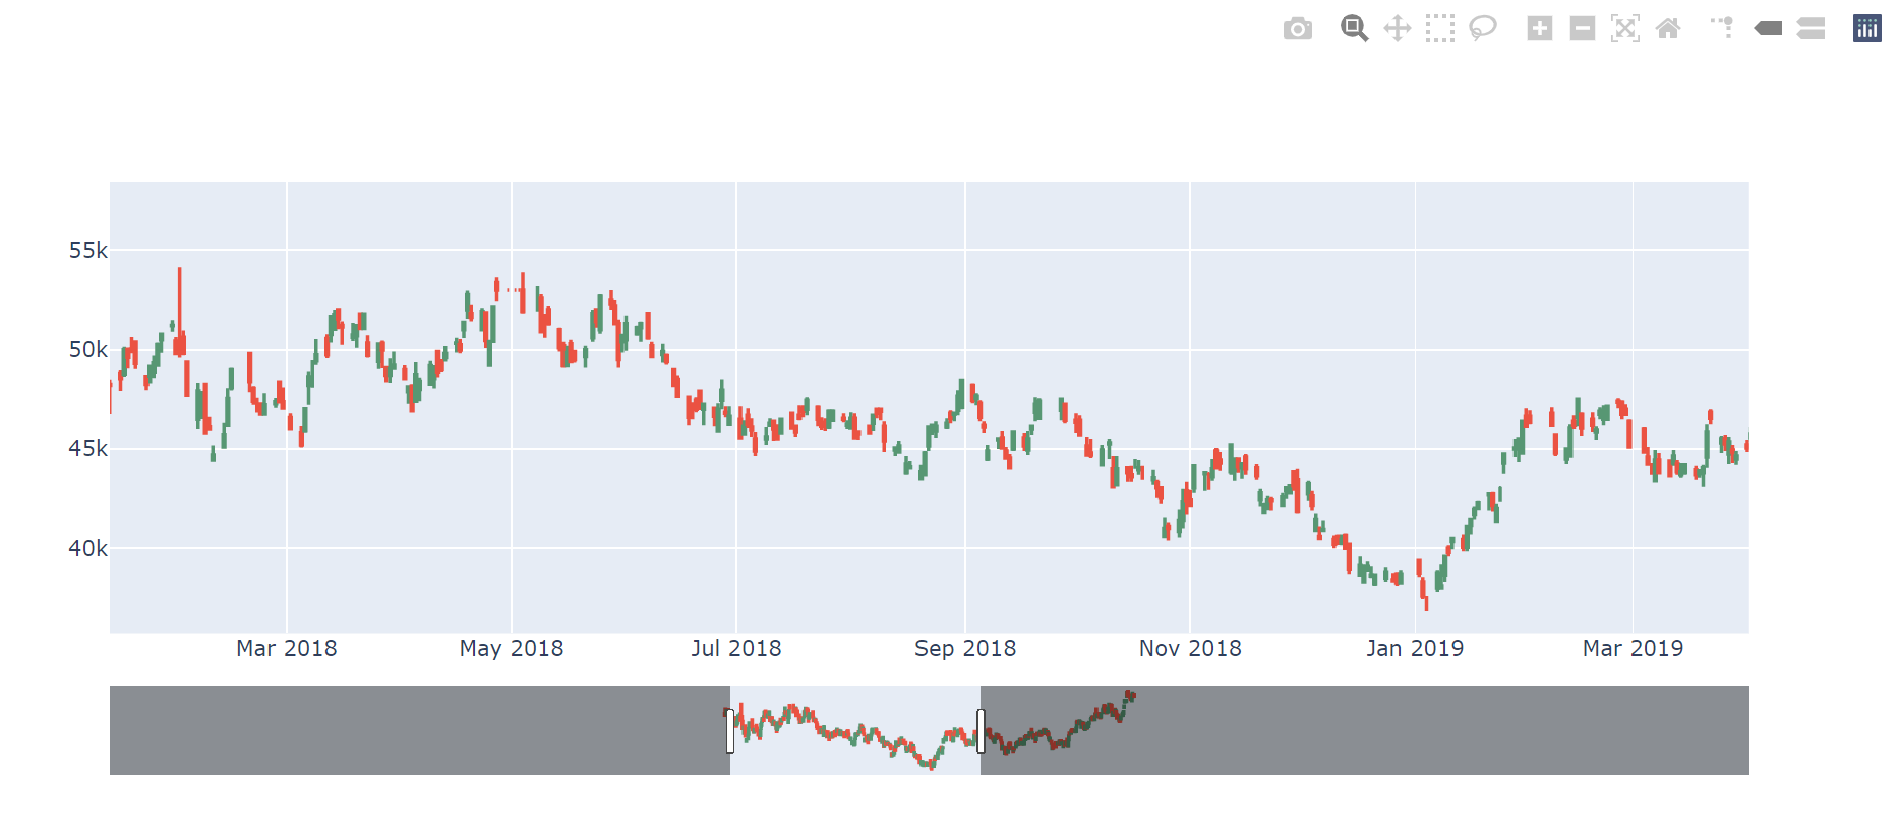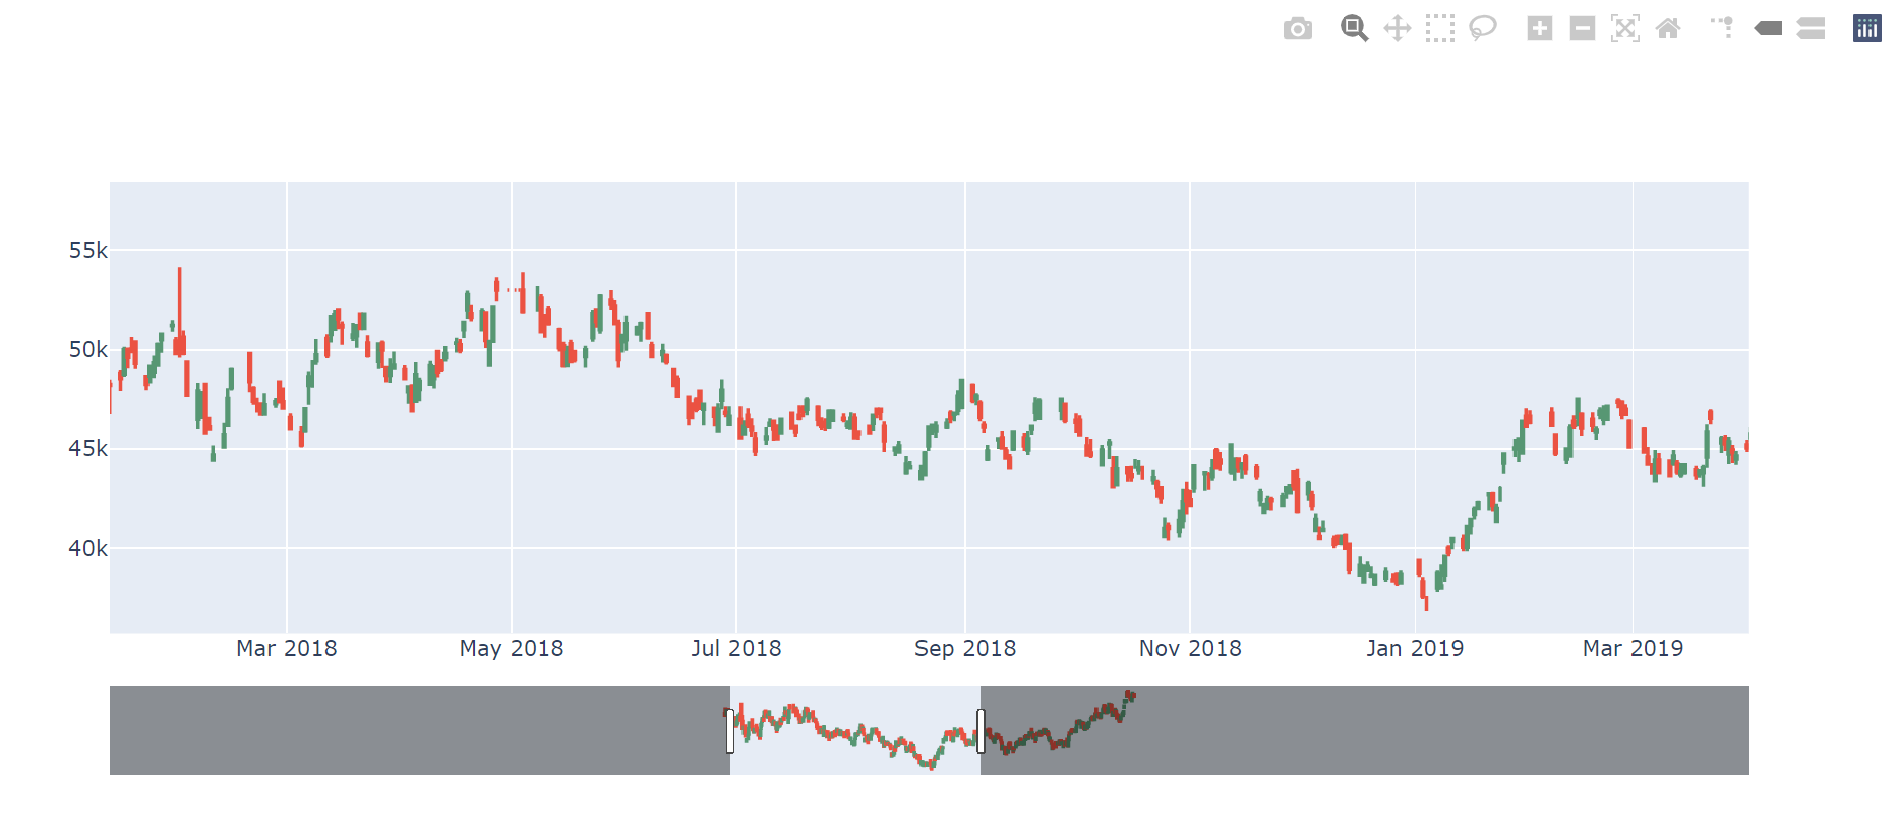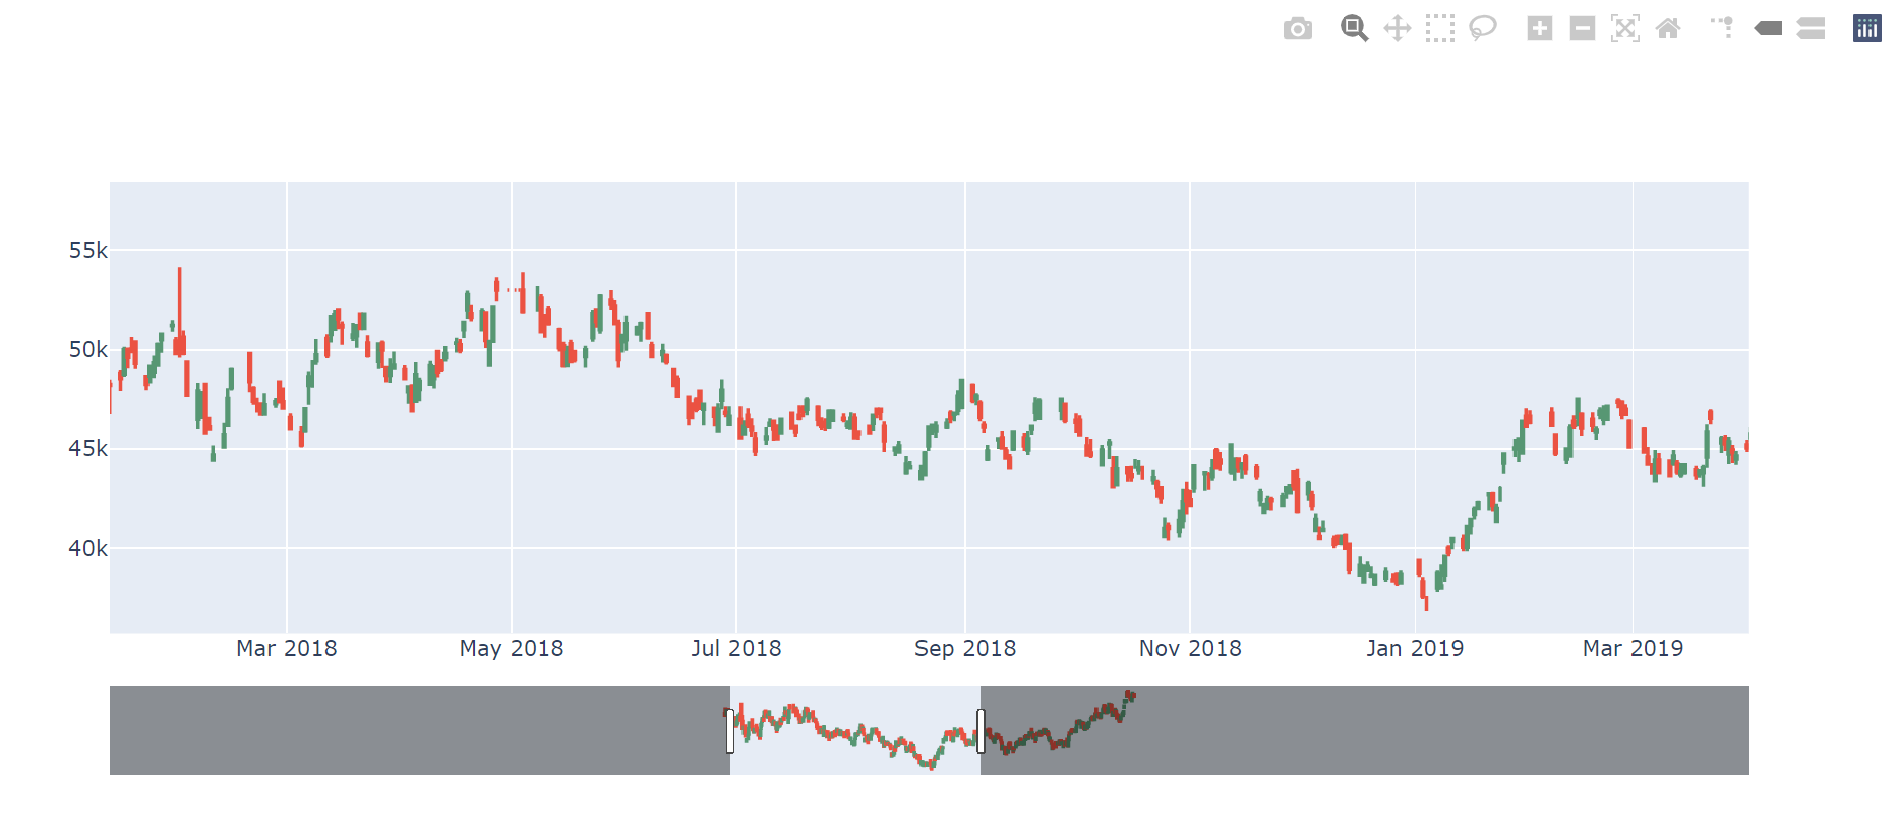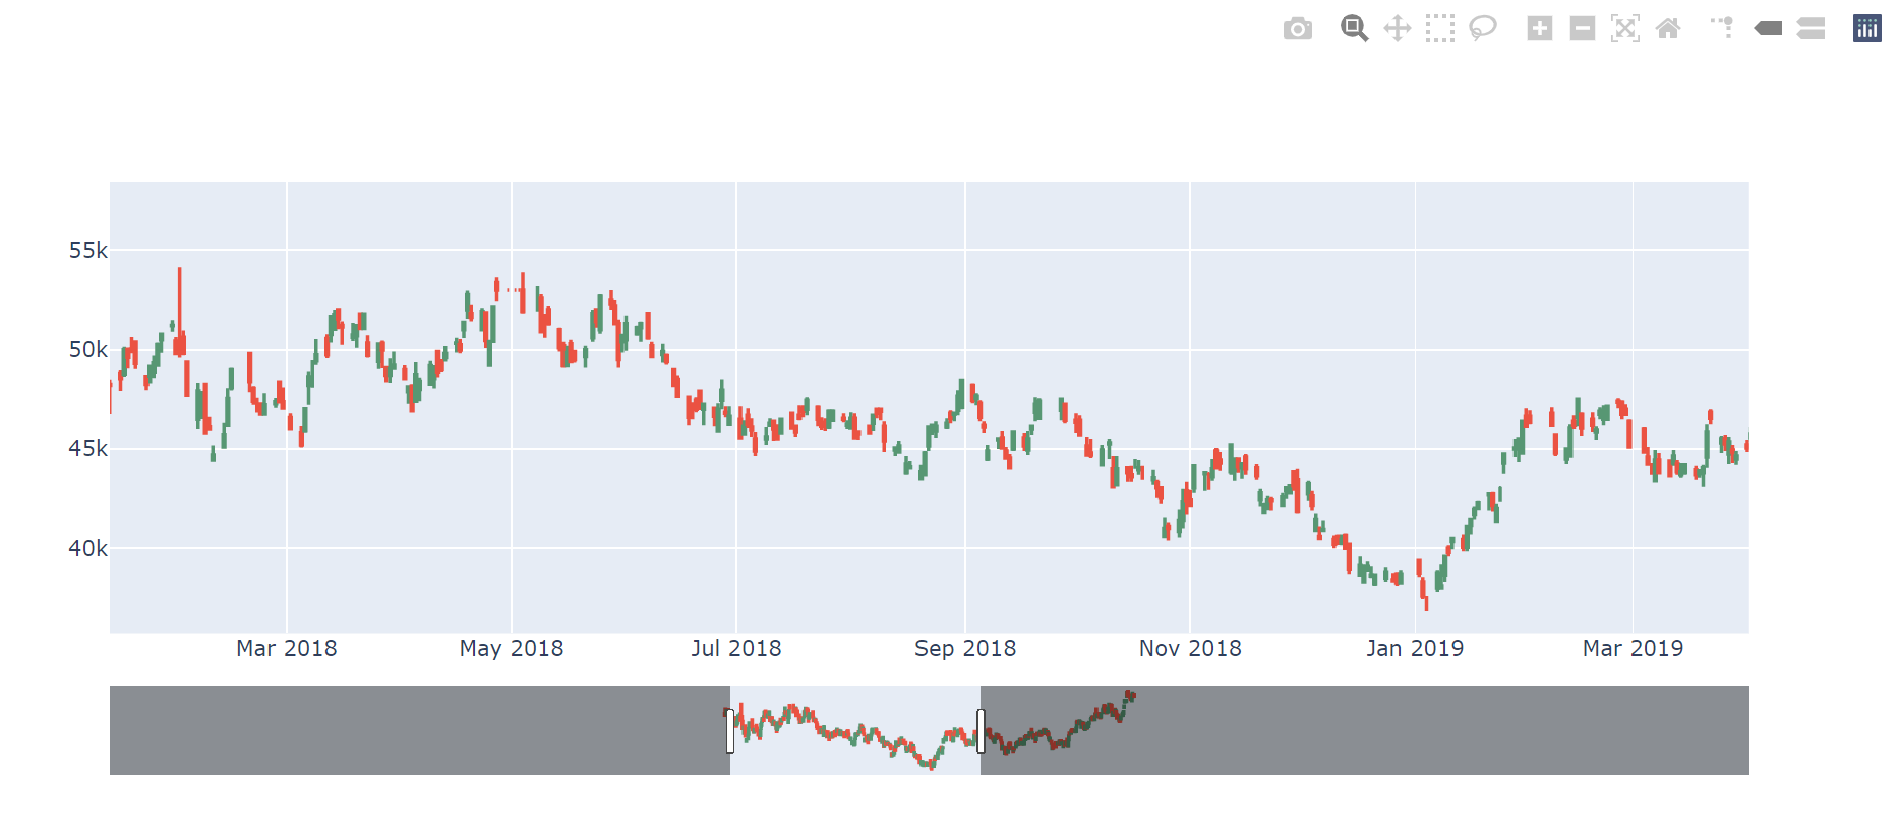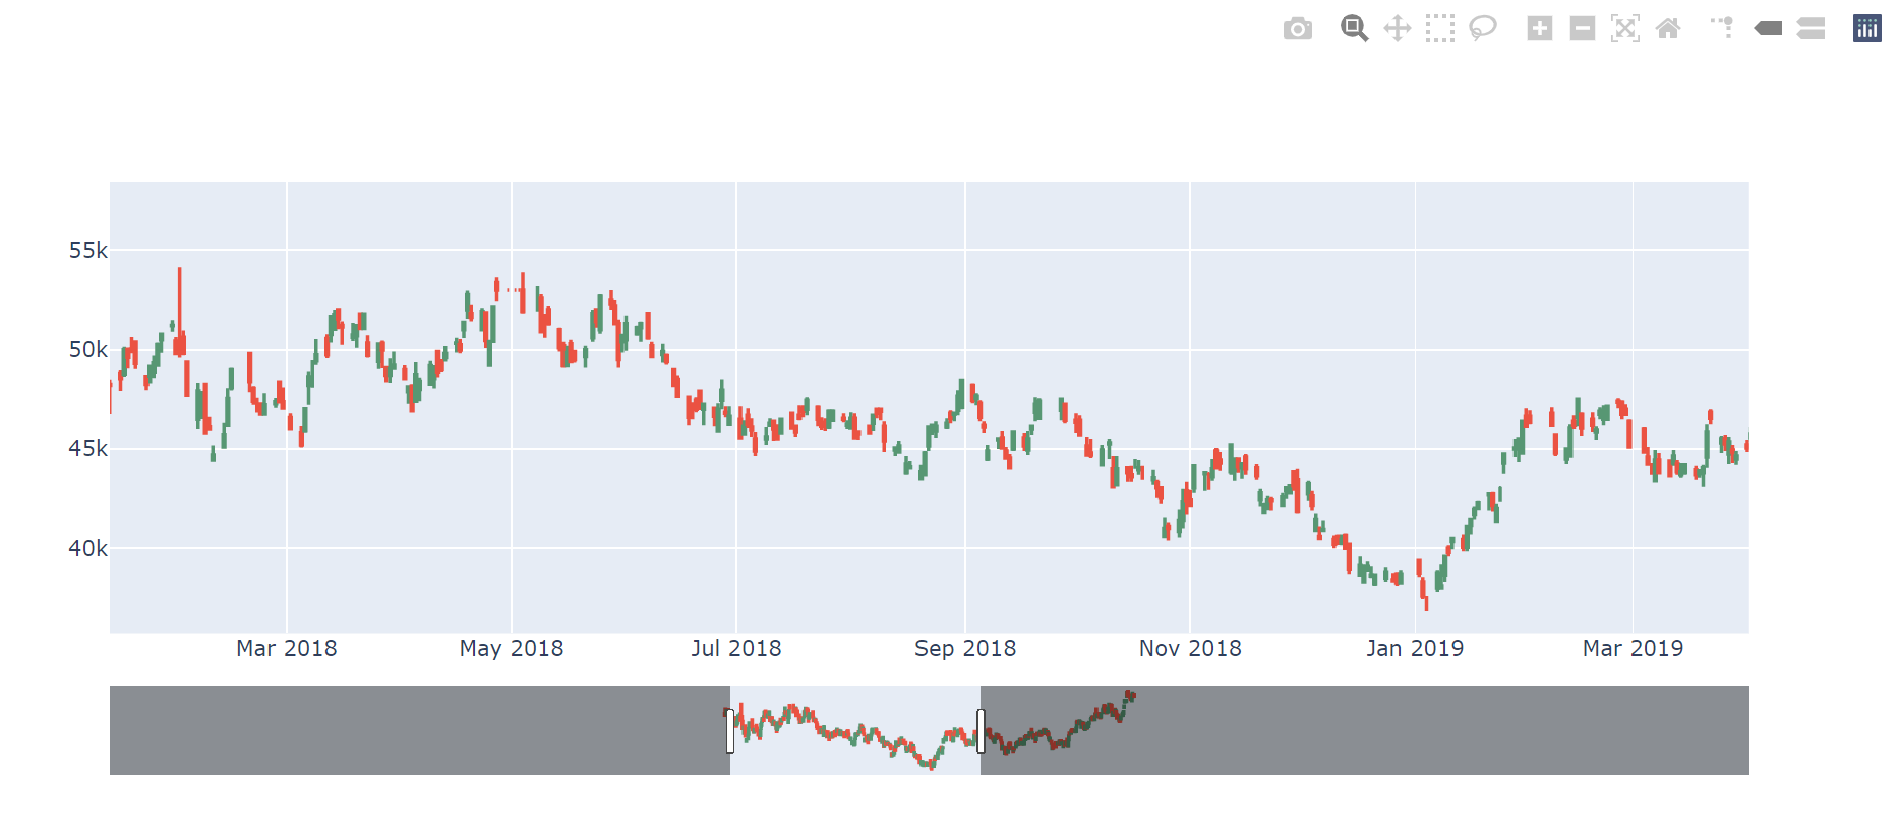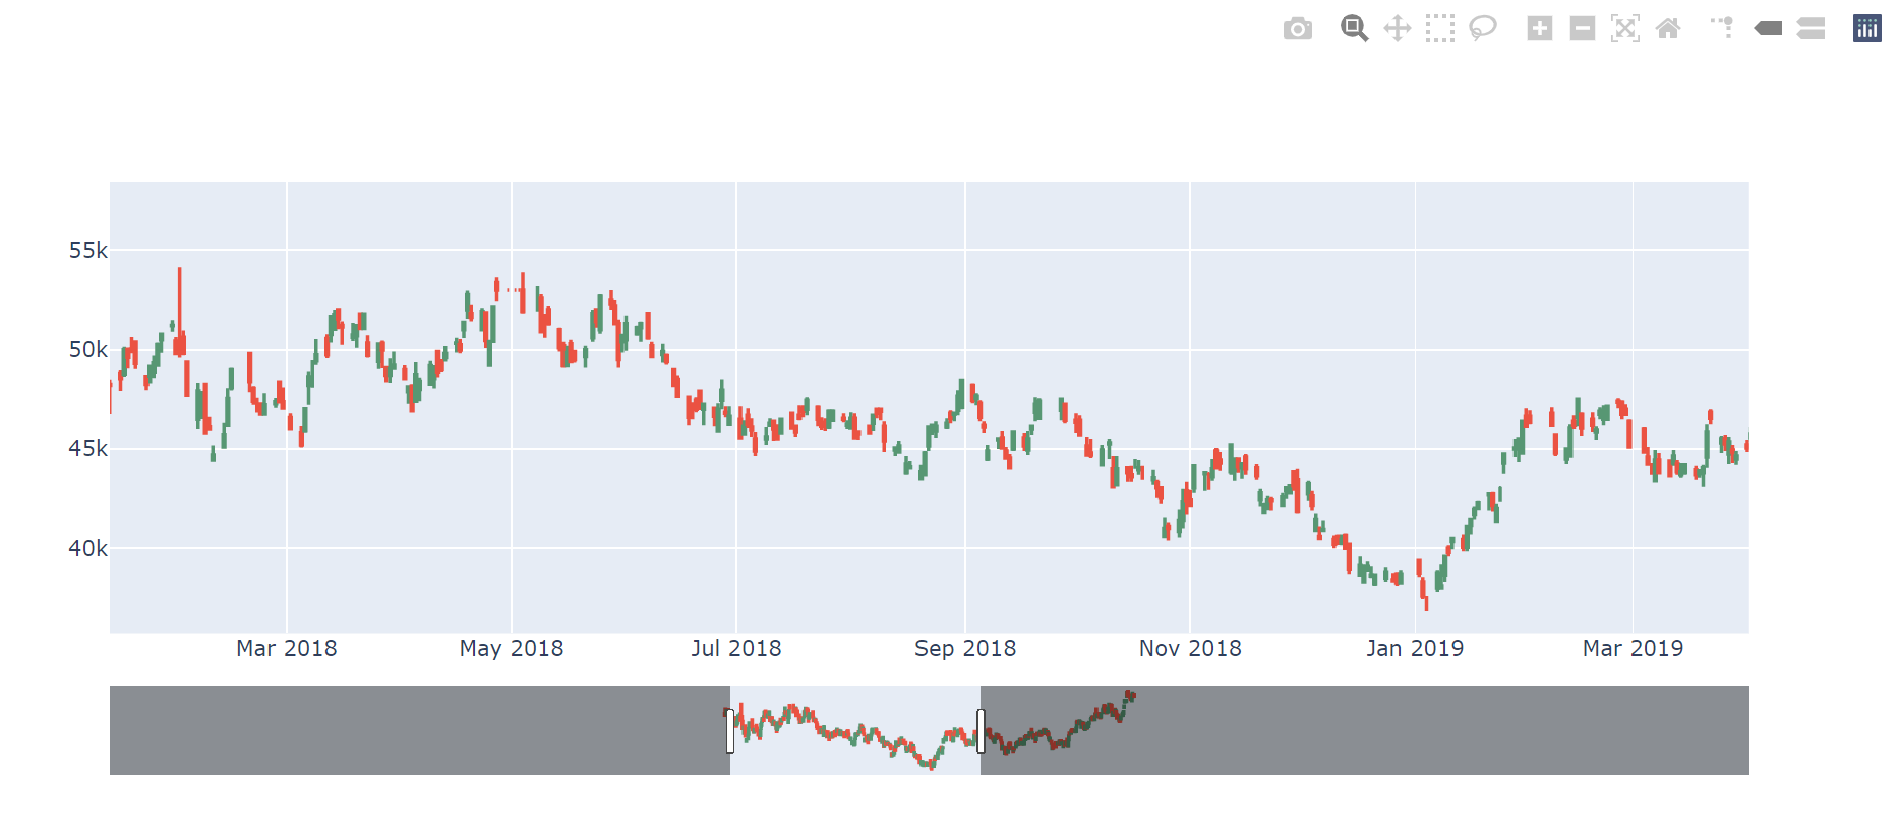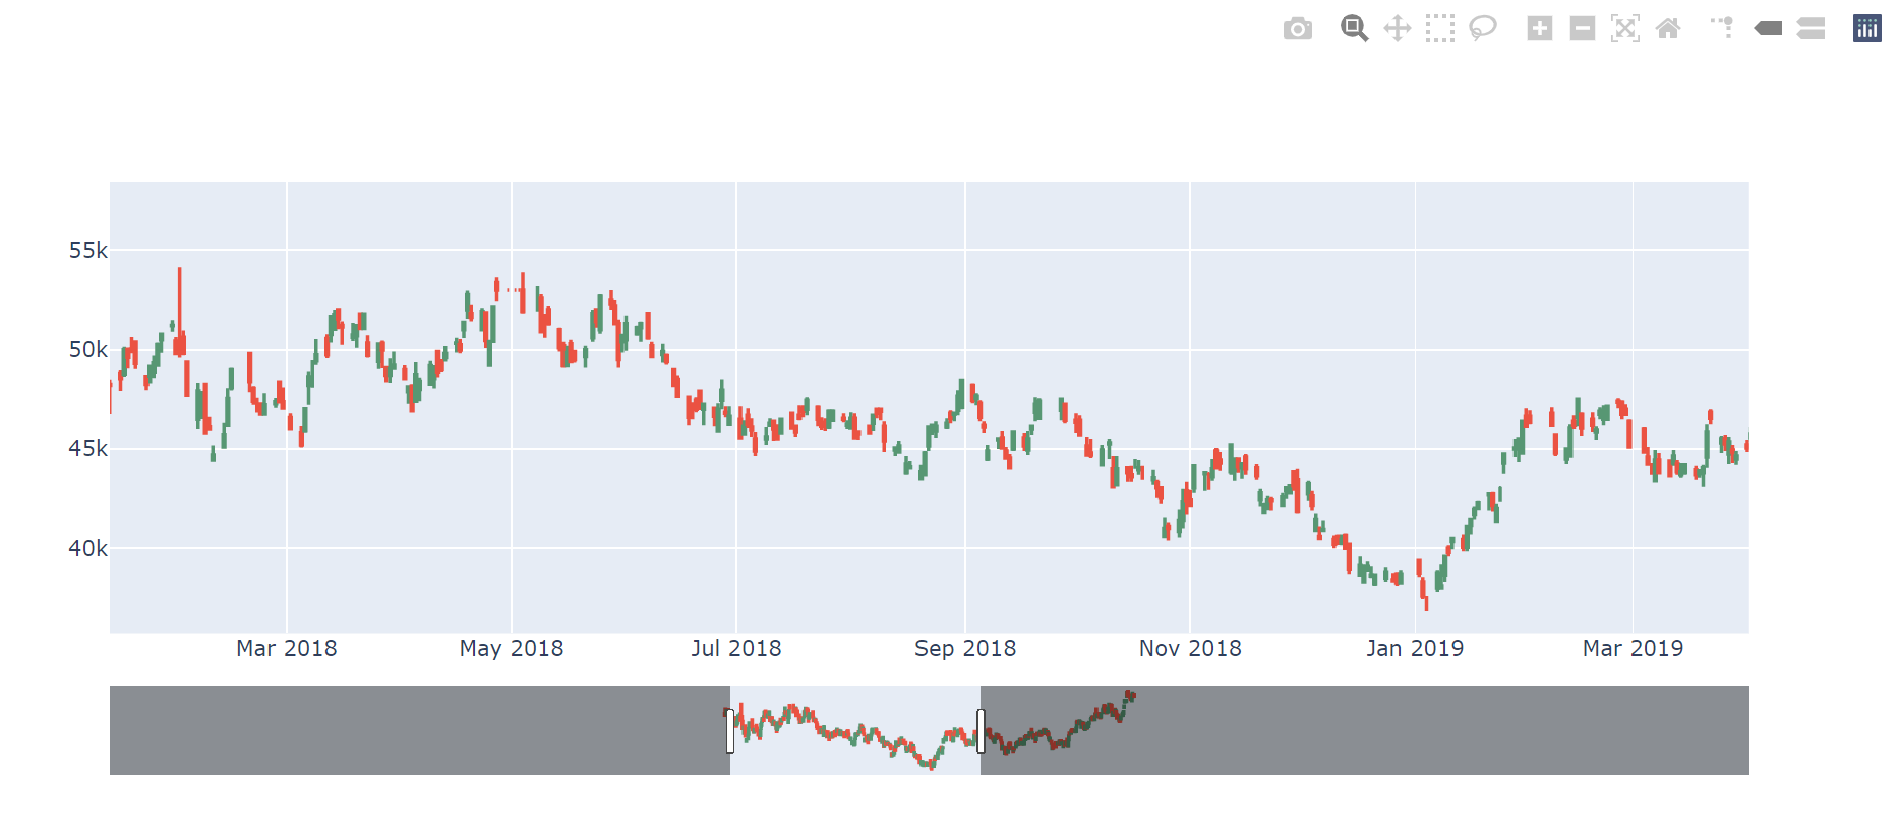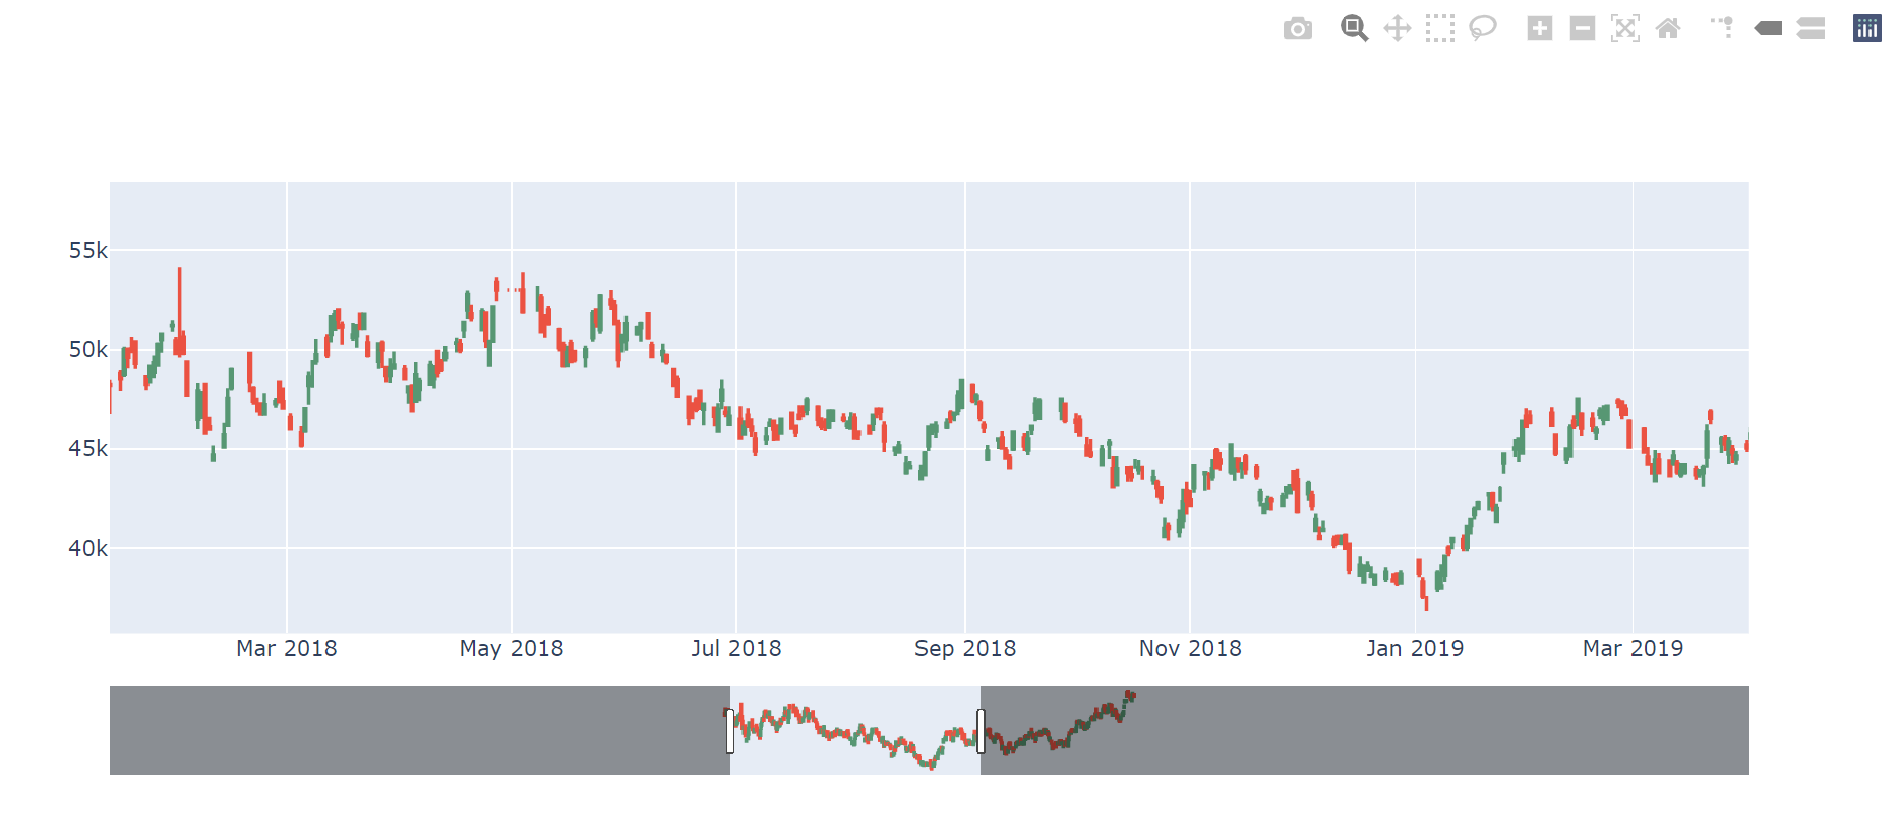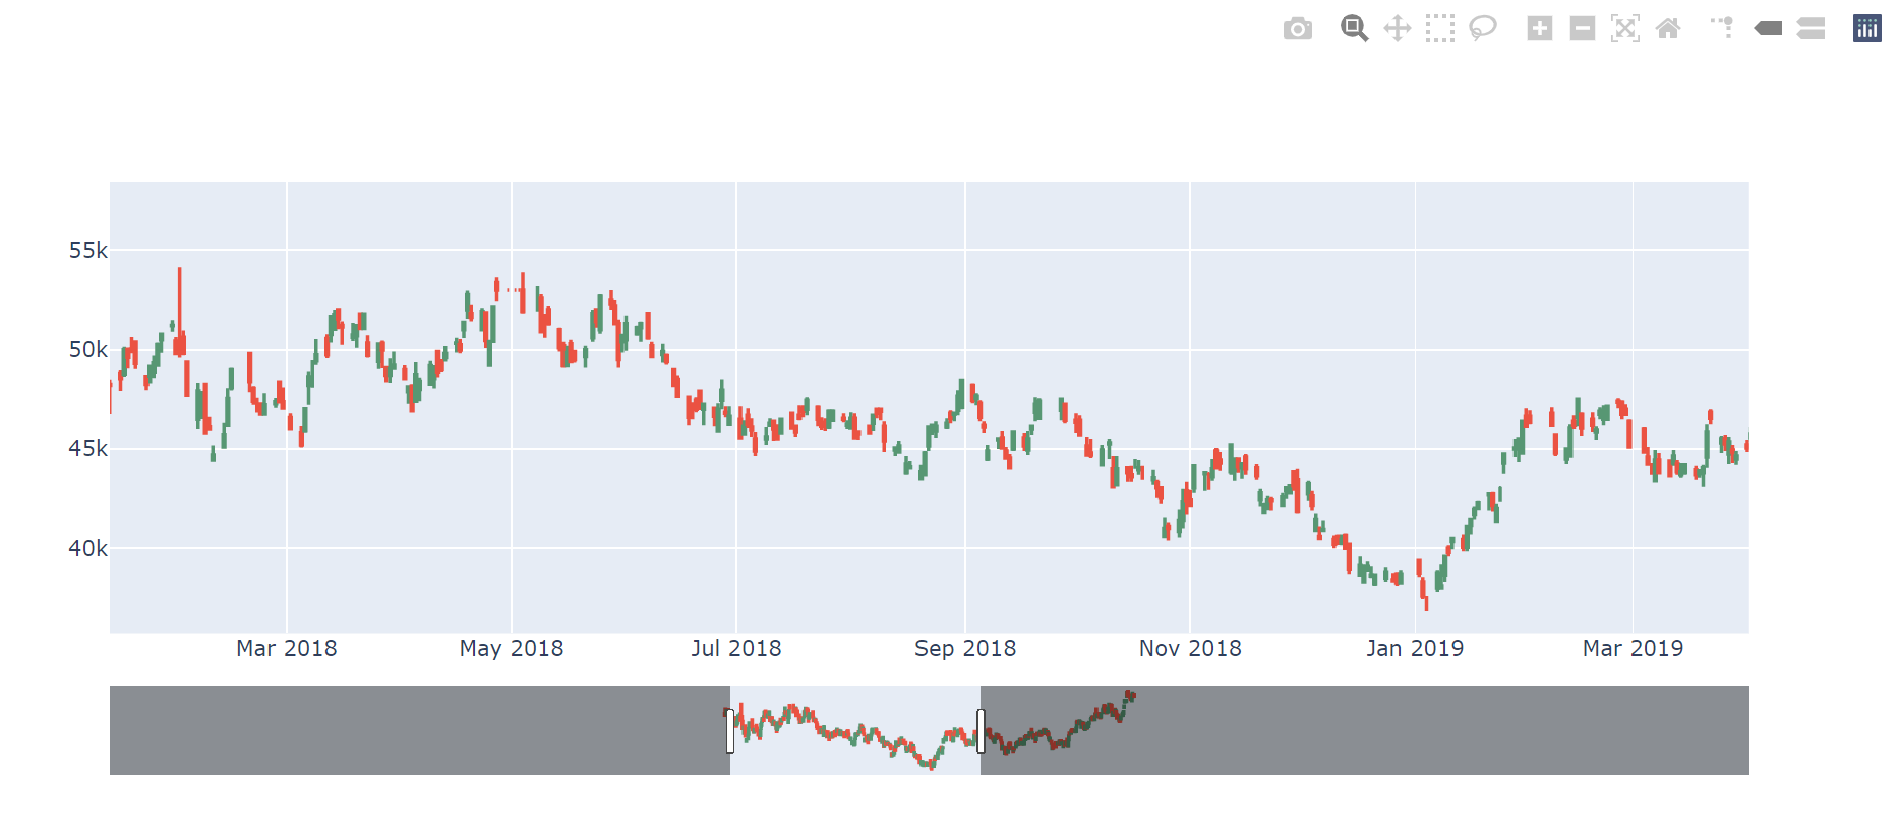* pycharm에서 실행 시 웹브라우저로 볼 수 있다.<br>
<img src="./img/img02.png">

# Fineplot

In [ ]:
# ! pip install finplot

In [ ]:
import finplot as fplt

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')
print(df.head())

# import FinanceDataReader as fdr 
# df = fdr.DataReader(symbol="KS11", start="2021")

fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']])
# fplt.show()

* pycharm에서 실행 시 어플로 볼 수 있다.<br>
<img src="./img/img03.png" width=700>